In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
filepath = '/home/user/Desktop/env2/VAR/Libor_sofr_org_value_adjusted.xlsx'
df = pd.read_excel(filepath,lineterminator='\n')
#df.index=df['Date']
#df=df.drop(['Week day'],axis=1)

#df['ON'].isnull().sum()
# df=df.iloc[::-1]
# df.to_csv("/home/user/Desktop/env2/VAR/libor_rev.xlsx",index=False)
df['Time_Period'] = range(1, len(df)+1)
df=df[["Date","LIBOR ON","SOFR Index","SONIA DAILY RATE","TIIE DAILY AVG RATES","Time_Period"]]
#df=df.drop(['Date'],axis=1)
df['SONIA DAILY RATE']=df['SONIA DAILY RATE'].fillna(method='ffill')
# df.dropna(inplace=True)
# # print(df['180-Day Average SOFR'].isnull().sum())
df.head()

,Date,LIBOR ON,SOFR Index,SONIA DAILY RATE,TIIE DAILY AVG RATES,Time_Period
0,04.01.2016,0.3658,1.0,0.4648,3.30,1
1,05.01.2016,0.3650,1.0,0.4676,3.37,2
2,06.01.2016,0.3661,1.0,0.4717,3.34,3
3,07.01.2016,0.3651,1.0,0.4668,3.30,4
4,08.01.2016,0.3662,1.0,0.4660,3.27,5


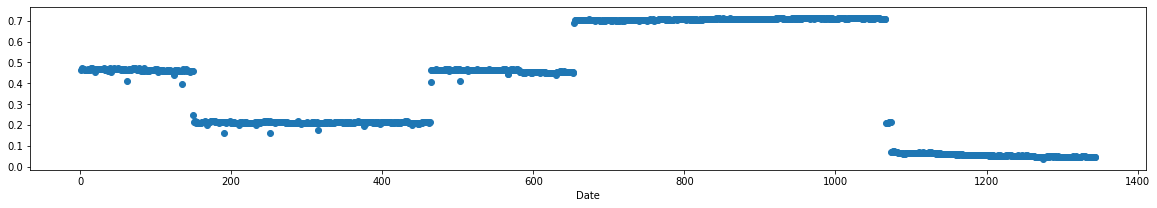

In [3]:
# Plot
plt.rcParams["figure.figsize"] = (20,3)
plt.scatter(df['Time_Period'],df['SONIA DAILY RATE'].astype(float),linewidth=1)
plt.xlabel('Date')
plt.show()

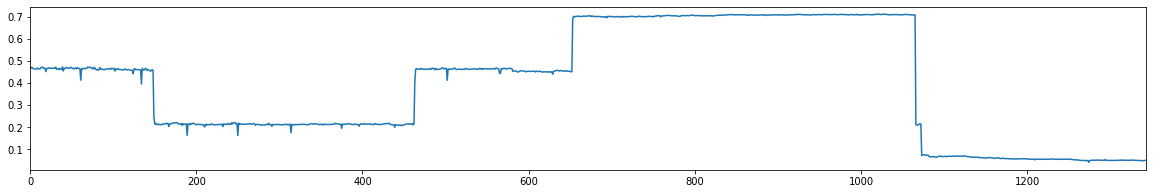

In [4]:
df["SONIA DAILY RATE"].plot()

In [5]:
df_differenced = df["SONIA DAILY RATE"].astype(float).diff().dropna()
#df_differenced1 = df_differenced.astype(float).diff().dropna()

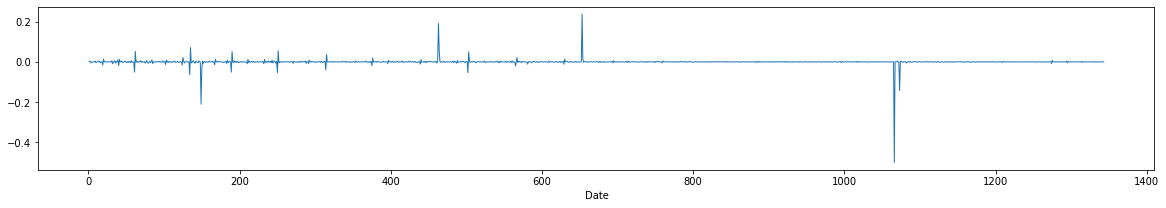

In [6]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(df_differenced,linewidth=1)
plt.xlabel('Date')
plt.show()

In [7]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df['Time_Period'], df["TIIE DAILY AVG RATES"], test_size=0.2, random_state=0, shuffle=False)

In [8]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# model = LinearRegression()
# model.fit(X_train.values.reshape(-1,1), y_train)
# y_pred = model.predict(X_test.values.reshape(-1,1))


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(df['Time_Period'].values.reshape(-1,1))
pol_reg = LinearRegression()
pol_reg.fit(X_poly, df['SONIA DAILY RATE'])
print(r2_score(df['SONIA DAILY RATE'],pol_reg.predict(poly_reg.fit_transform(df['Time_Period'].values.reshape(-1,1)))))
#print(df['Date'])

## Visualizing the Polymonial Regression results
#plt.rcParams["figure.figsize"] = (7,5)
#plt.scatter(df['Time_Period'], df['TIIE DAILY AVG RATES'].astype(float), color='red')
#plt.scatter(X_train.values, pol_reg.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color='blue')
#plt.legend(["Original Data", "Trend Line"], loc ="upper right")
#plt.title('TREND OF TIIE DAILY AVG RATES')
#plt.xlabel('Time')
#plt.ylabel('TIIE')
#plt.show()


0.7639851068299107


In [9]:
# len(X_train),len(X_test)

In [10]:
ndf=df

In [11]:
ndf["SONIA DAILY RATE Trend Line"]=pol_reg.predict(poly_reg.fit_transform(df['Time_Period'].values.reshape(-1,1)))

In [12]:
ndf.index=ndf["Date"]

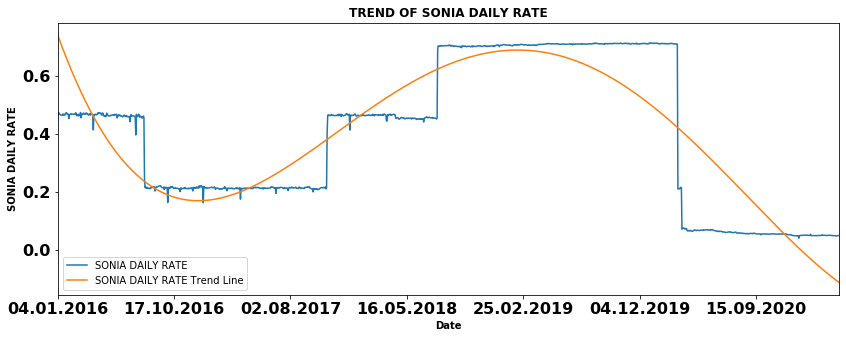

In [13]:
plt.figure(figsize=(14,5))
ndf["SONIA DAILY RATE"].plot(legend=True)
ndf["SONIA DAILY RATE Trend Line"].plot(legend=True)
plt.title('TREND OF SONIA DAILY RATE',fontweight='bold')
plt.xticks(fontsize='16',fontweight='bold')
plt.yticks(fontsize='16',fontweight='bold')
plt.xlabel('Date',fontweight='bold')
plt.ylabel('SONIA DAILY RATE',fontweight='bold')
plt.show()

In [14]:
# df=df[df["SOFR Index"]>1]

In [15]:
# ColName="SOFR Index"

In [16]:
# df[ColName]=df[ColName].ffill()

In [17]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df['Time_Period'], df[ColName], test_size=0.2, random_state=0, shuffle=False)
# print(len(X_train),len(X_test))
# # Fitting Polynomial Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# # model = LinearRegression()
# # model.fit(X_train.values.reshape(-1,1), y_train)
# # y_pred = model.predict(X_test.values.reshape(-1,1))


# poly_reg = PolynomialFeatures(degree=2)
# X_poly = poly_reg.fit_transform(X_train.values.reshape(-1,1))
# pol_reg = LinearRegression()
# pol_reg.fit(X_poly, y_train)
# print(r2_score(y_train,pol_reg.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1)))))
# #print(df['Date'])

## Visualizing the Polymonial Regression results
#plt.rcParams["figure.figsize"] = (7,5)
#plt.scatter(df['Time_Period'], df['TIIE DAILY AVG RATES'].astype(float), color='red')
#plt.scatter(X_train.values, pol_reg.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1))), color='blue')
#plt.legend(["Original Data", "Trend Line"], loc ="upper right")
#plt.title('TREND OF TIIE DAILY AVG RATES')
#plt.xlabel('Time')
#plt.ylabel('TIIE')
#plt.show()


In [18]:
# ndf=df[:620]
# ndf[ColName+" Trend Line"]=pol_reg.predict(poly_reg.fit_transform(X_train.values.reshape(-1,1)))
# ndf.index=ndf["Date"]

In [19]:
# plt.figure(figsize=(16,8))
# ndf[ColName].plot(legend=True)
# ndf[ColName+" Trend Line"].plot(legend=True)